## Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
from scipy import stats
import math

from tensorflow.keras.preprocessing.image import load_img, img_to_array,ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D,AveragePooling2D
from tensorflow.keras.models import Model,Sequential,load_model
from tensorflow.keras.optimizers import Adam,SGD,RMSprop,Nadam
from tensorflow.keras.callbacks import TensorBoard,ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


Init Plugin
Init Graph Optimizer
Init Kernel


## Displaying Images

In [2]:
picture_size = 48
folder_path = "/Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/"

## Making Training and Validation Data

In [3]:
batch_size  = 100

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"test",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
number_of_examples = len(test_set.filenames)
number_of_generator_calls = math.ceil(7178 / (1.0 * 100)) 
# 1.0 above is to skip integer division

test_labels = []

for i in range(0,int(number_of_generator_calls)):
#     print(np.array(test_set[i][1]))
    test_labels.extend(np.array(test_set[i][1]))

In [5]:
final_lables=[]
for i in test_labels:
    final_lables.append(i.argmax(axis=0))
final_lables=np.array(final_lables)

## Model 1 Building

In [6]:
epoc_constant=100
stopping_patience=20

## Base Model 1 relu-adam

In [29]:
no_of_classes = 7

model1 = Sequential()

# #1st CNN layer
model1.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(AveragePooling2D(pool_size = (2,2)))
model1.add(Dropout(0.25))

#2nd CNN layer
model1.add(Conv2D(128,(5,5),padding = 'same'))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(AveragePooling2D(pool_size = (2,2)))
model1.add(Dropout (0.25))


model1.add(Flatten())

#Fully connected 1st layer
model1.add(Dense(128))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dropout(0.25))


model1.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model1.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()


#Fitting the Model1 with Training and Validation Data

checkpoint = ModelCheckpoint(filepath="/Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/base_relu_adam1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=stopping_patience,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = epoc_constant

model1.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

#Execute Model1

history1 = model1.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_21 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
activation_21 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
average_pooling2d_8 (Average (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_22 (Batc (None, 24, 24, 128)      

2021-12-15 01:19:56.299800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


287/287 [==============================] - ETA: 0s - loss: 1.6502 - accuracy: 0.3708

2021-12-15 01:20:25.812820: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


287/287 [==============================] - 32s 109ms/step - loss: 1.6502 - accuracy: 0.3708 - val_loss: 1.6687 - val_accuracy: 0.3638

Epoch 00001: val_accuracy improved from -inf to 0.36380, saving model to /Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/base_relu_adam1.h5
Epoch 2/100
287/287 [==============================] - 30s 105ms/step - loss: 1.3706 - accuracy: 0.4749 - val_loss: 1.4107 - val_accuracy: 0.4506

Epoch 00002: val_accuracy improved from 0.36380 to 0.45056, saving model to /Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/base_relu_adam1.h5
Epoch 3/100
287/287 [==============================] - 30s 105ms/step - loss: 1.2425 - accuracy: 0.5284 - val_loss: 1.4003 - val_accuracy: 0.4462

Epoch 00003: val_accuracy did not improve from 0.45056
Epoch 4/100
287/287 [==============================] - 30s 104ms/step - loss: 1.1536 - accuracy: 0.5639 - val_loss: 1.5007 - val_accuracy: 0.4346

Epoch 00004: val_accur

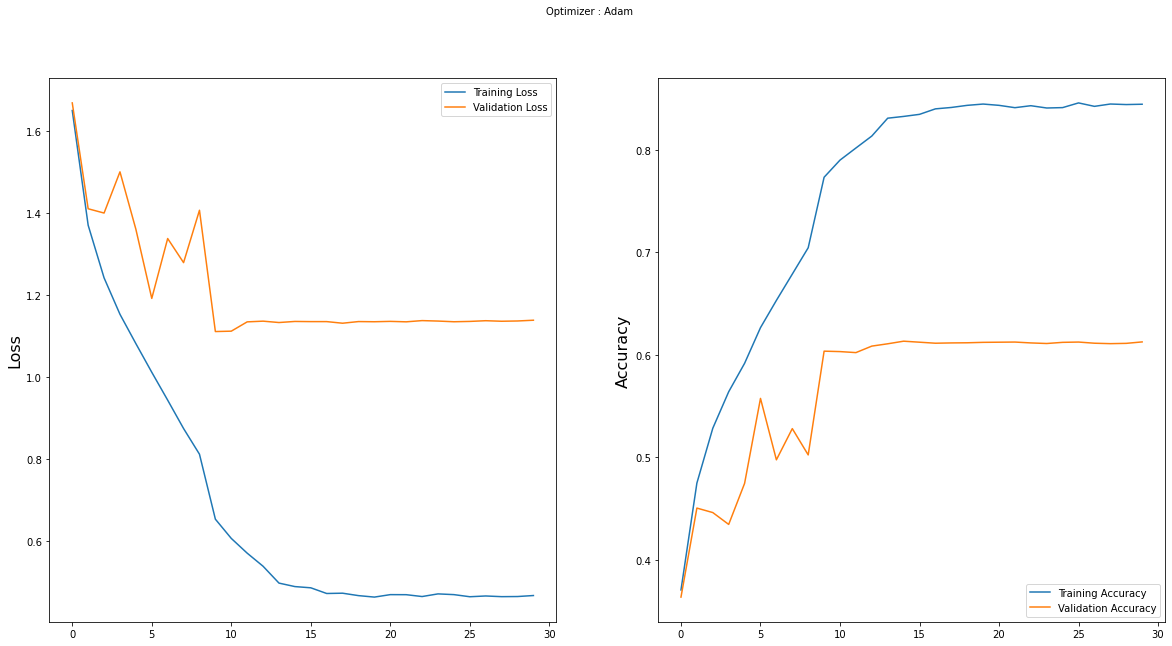

In [30]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

## Base Model 2 relu SGD

In [ ]:
no_of_classes = 7

model2 = Sequential()

# #1st CNN layer
model2.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))
model2.add(Dropout(0.25))

#2nd CNN layer
model2.add(Conv2D(128,(5,5),padding = 'same'))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))
model2.add(Dropout (0.25))


model2.add(Flatten())

#Fully connected 1st layer
model2.add(Dense(128))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.25))


model2.add(Dense(no_of_classes, activation='softmax'))



opt = SGD(lr = 0.0001)
model2.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()


#Fitting the Model2 with Training and Validation Data

checkpoint = ModelCheckpoint(filepath="/Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/base_relu_SGD1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=stopping_patience,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = epoc_constant

model2.compile(loss='categorical_crossentropy',
              optimizer = SGD(lr=0.001),
              metrics=['accuracy'])

#Execute Model2

history2 = model2.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )


Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Bat

2021-12-15 03:06:53.281108: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-15 03:06:53.281670: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supp

Epoch 1/100
287/287 [==============================] - ETA: 0s - loss: 2.1853 - accuracy: 0.1929

2021-12-15 03:07:22.983796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


287/287 [==============================] - 31s 108ms/step - loss: 2.1853 - accuracy: 0.1929 - val_loss: 1.7901 - val_accuracy: 0.3177

Epoch 00001: val_accuracy improved from -inf to 0.31775, saving model to /Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/base_relu_SGD1.h5
Epoch 2/100
287/287 [==============================] - 31s 107ms/step - loss: 1.9393 - accuracy: 0.2722 - val_loss: 1.6647 - val_accuracy: 0.3662

Epoch 00002: val_accuracy improved from 0.31775 to 0.36620, saving model to /Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/base_relu_SGD1.h5
Epoch 3/100
287/287 [==============================] - 31s 107ms/step - loss: 1.8368 - accuracy: 0.3131 - val_loss: 1.6164 - val_accuracy: 0.3904

Epoch 00003: val_accuracy improved from 0.36620 to 0.39042, saving model to /Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/base_relu_SGD1.h5
Epoch 4/100
287/287 [==============================]

287/287 [==============================] - 31s 107ms/step - loss: 1.3997 - accuracy: 0.4678 - val_loss: 1.3589 - val_accuracy: 0.4845

Epoch 00030: val_accuracy improved from 0.48296 to 0.48451, saving model to /Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/base_relu_SGD1.h5
Epoch 31/100
287/287 [==============================] - 31s 107ms/step - loss: 1.3952 - accuracy: 0.4685 - val_loss: 1.3441 - val_accuracy: 0.4897

Epoch 00031: val_accuracy improved from 0.48451 to 0.48972, saving model to /Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/base_relu_SGD1.h5
Epoch 32/100
287/287 [==============================] - 31s 107ms/step - loss: 1.3861 - accuracy: 0.4743 - val_loss: 1.3491 - val_accuracy: 0.4858

Epoch 00032: val_accuracy did not improve from 0.48972
Epoch 33/100
287/287 [==============================] - 31s 107ms/step - loss: 1.3793 - accuracy: 0.4776 - val_loss: 1.3619 - val_accuracy: 0.4862

Epoch 00033: val_a


Epoch 00062: val_accuracy did not improve from 0.49944
Epoch 63/100
287/287 [==============================] - 31s 108ms/step - loss: 1.3411 - accuracy: 0.4876 - val_loss: 1.3179 - val_accuracy: 0.4985

Epoch 00063: val_accuracy did not improve from 0.49944
Epoch 64/100
287/287 [==============================] - 31s 109ms/step - loss: 1.3470 - accuracy: 0.4864 - val_loss: 1.3198 - val_accuracy: 0.4969

Epoch 00064: val_accuracy did not improve from 0.49944

Epoch 00064: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Epoch 65/100
272/287 [===========================>..] - ETA: 1s - loss: 1.3453 - accuracy: 0.4901

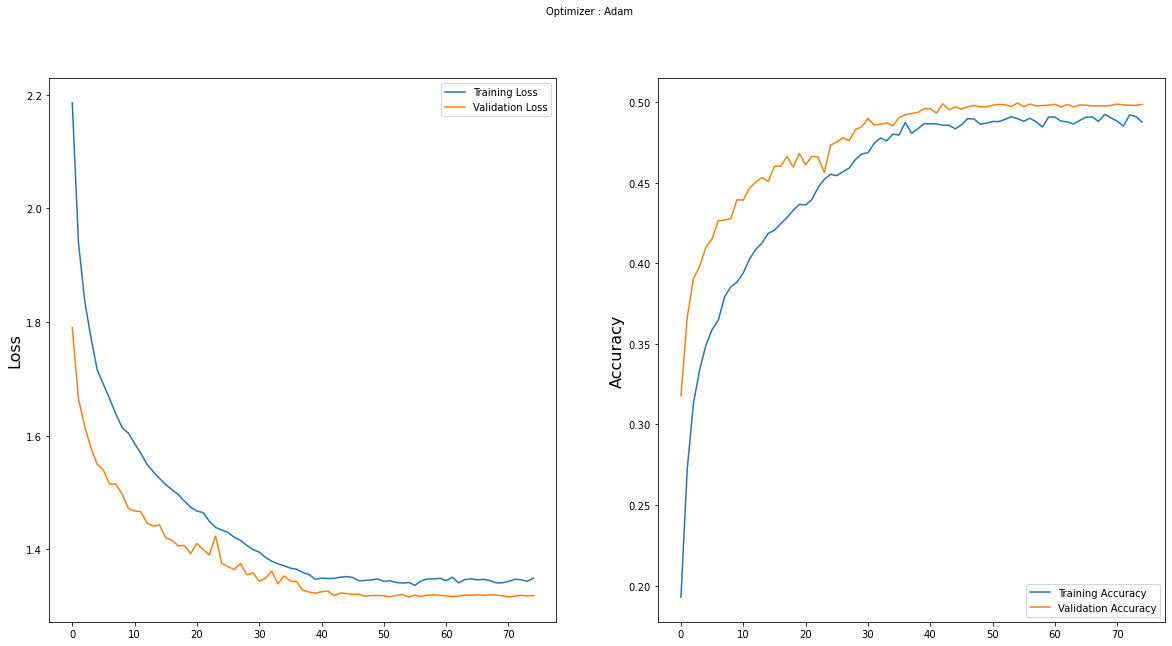

In [17]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

## Base Model 3 relu Nadam

In [18]:
no_of_classes = 7

model3 = Sequential()

# #1st CNN layer
model3.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size = (2,2)))
model3.add(Dropout(0.5))

#2nd CNN layer
model3.add(Conv2D(128,(5,5),padding = 'same'))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size = (2,2)))
model3.add(Dropout (0.5))


model3.add(Flatten())

#Fully connected 1st layer
model3.add(Dense(128))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(Dropout(0.5))


model3.add(Dense(no_of_classes, activation='softmax'))



opt = Nadam(lr = 0.0001)
model3.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()


#Fitting the Model3 with Training and Validation Data

checkpoint = ModelCheckpoint(filepath="/Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/base_relu_Nadam1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=stopping_patience,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = epoc_constant

model3.compile(loss='categorical_crossentropy',
              optimizer = Nadam(lr=0.001),
              metrics=['accuracy'])

#Execute Model3

history3 = model3.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_15 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
activation_15 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_16 (Batc (None, 24, 24, 128)      

2021-12-15 10:24:04.760880: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


287/287 [==============================] - ETA: 0s - loss: 1.8185 - accuracy: 0.3267

2021-12-15 10:24:37.623903: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


287/287 [==============================] - 35s 121ms/step - loss: 1.8185 - accuracy: 0.3267 - val_loss: 1.5159 - val_accuracy: 0.4179

Epoch 00001: val_accuracy improved from -inf to 0.41789, saving model to /Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/base_relu_Nadam1.h5
Epoch 2/100
287/287 [==============================] - 34s 119ms/step - loss: 1.5010 - accuracy: 0.4237 - val_loss: 1.4564 - val_accuracy: 0.4438

Epoch 00002: val_accuracy improved from 0.41789 to 0.44380, saving model to /Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/base_relu_Nadam1.h5
Epoch 3/100
287/287 [==============================] - 34s 119ms/step - loss: 1.3989 - accuracy: 0.4626 - val_loss: 1.3645 - val_accuracy: 0.4792

Epoch 00003: val_accuracy improved from 0.44380 to 0.47915, saving model to /Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/base_relu_Nadam1.h5
Epoch 4/100
287/287 [=========================

287/287 [==============================] - 34s 119ms/step - loss: 0.8680 - accuracy: 0.6722 - val_loss: 1.0839 - val_accuracy: 0.5976

Epoch 00030: val_accuracy did not improve from 0.60014
Epoch 31/100
287/287 [==============================] - 35s 124ms/step - loss: 0.8646 - accuracy: 0.6734 - val_loss: 1.0875 - val_accuracy: 0.5958

Epoch 00031: val_accuracy did not improve from 0.60014

Epoch 00031: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Epoch 32/100
287/287 [==============================] - 36s 127ms/step - loss: 0.8640 - accuracy: 0.6762 - val_loss: 1.0821 - val_accuracy: 0.5975

Epoch 00032: val_accuracy did not improve from 0.60014
Epoch 33/100
287/287 [==============================] - 34s 119ms/step - loss: 0.8657 - accuracy: 0.6782 - val_loss: 1.0833 - val_accuracy: 0.6007

Epoch 00033: val_accuracy improved from 0.60014 to 0.60070, saving model to /Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/base_relu_Nadam1.h5


Epoch 00064: val_accuracy did not improve from 0.60141
Epoch 65/100
287/287 [==============================] - 34s 118ms/step - loss: 0.8626 - accuracy: 0.6808 - val_loss: 1.0817 - val_accuracy: 0.6001
Restoring model weights from the end of the best epoch.

Epoch 00065: val_accuracy did not improve from 0.60141
Epoch 00065: early stopping


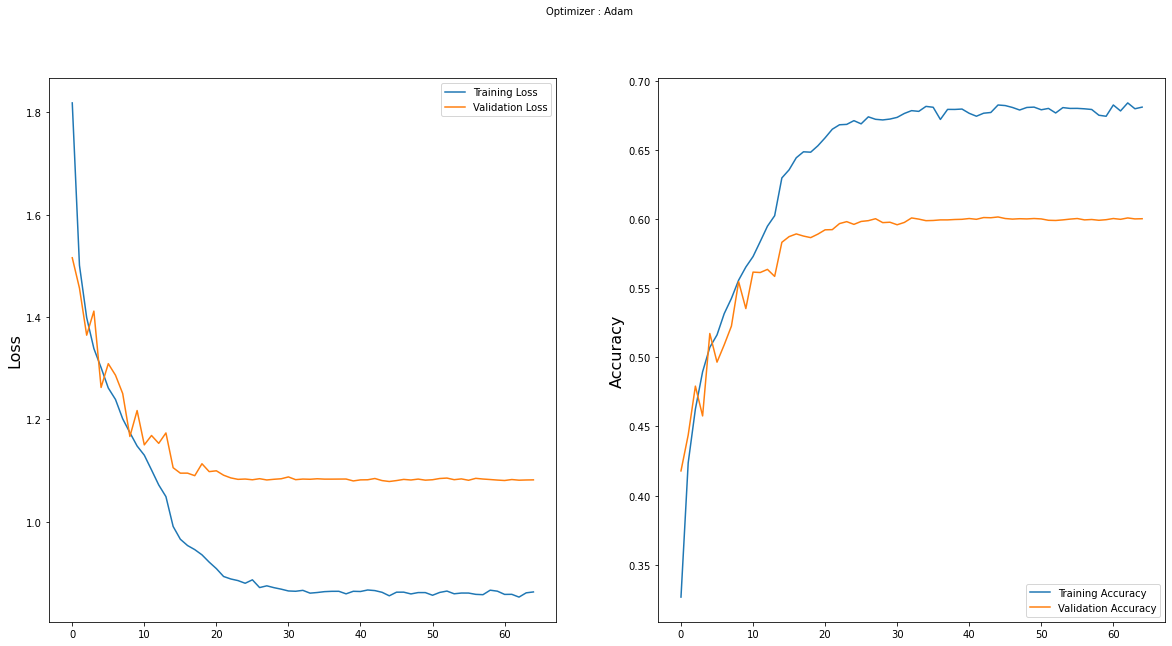

In [19]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

## Base Model 4 relu adam c-lr

In [20]:
no_of_classes = 7

model4 = Sequential()

# #1st CNN layer
model4.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size = (2,2)))
model4.add(Dropout(0.05))

#2nd CNN layer
model4.add(Conv2D(128,(5,5),padding = 'same'))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size = (2,2)))
model4.add(Dropout (0.05))


model4.add(Flatten())

#Fully connected 1st layer
model4.add(Dense(128))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(Dropout(0.05))


model4.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model4.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model4.summary()


#Fitting the Model4 with Training and Validation Data

checkpoint = ModelCheckpoint(filepath="/Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/base_relu_adam_clr.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=stopping_patience,
                          verbose=1,
                          restore_best_weights=True
                          )

# reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
#                               factor=0.2,
#                               patience=3,
#                               verbose=1,
#                               min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint]

epochs = epoc_constant

model4.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

#Execute Model4

history4 = model4.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_18 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
activation_18 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_19 (Batc (None, 24, 24, 128)      

2021-12-15 11:08:47.185520: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


287/287 [==============================] - ETA: 0s - loss: 1.5202 - accuracy: 0.4182

2021-12-15 11:09:16.861399: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


287/287 [==============================] - 32s 110ms/step - loss: 1.5202 - accuracy: 0.4182 - val_loss: 1.9536 - val_accuracy: 0.2725

Epoch 00001: val_accuracy improved from -inf to 0.27254, saving model to /Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/base_relu_adam_clr.h5
Epoch 2/100
287/287 [==============================] - 31s 109ms/step - loss: 1.2268 - accuracy: 0.5365 - val_loss: 1.4305 - val_accuracy: 0.4580

Epoch 00002: val_accuracy improved from 0.27254 to 0.45803, saving model to /Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/base_relu_adam_clr.h5
Epoch 3/100
287/287 [==============================] - 31s 109ms/step - loss: 1.0659 - accuracy: 0.6039 - val_loss: 1.2582 - val_accuracy: 0.5301

Epoch 00003: val_accuracy improved from 0.45803 to 0.53014, saving model to /Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/base_relu_adam_clr.h5
Epoch 4/100
287/287 [===================

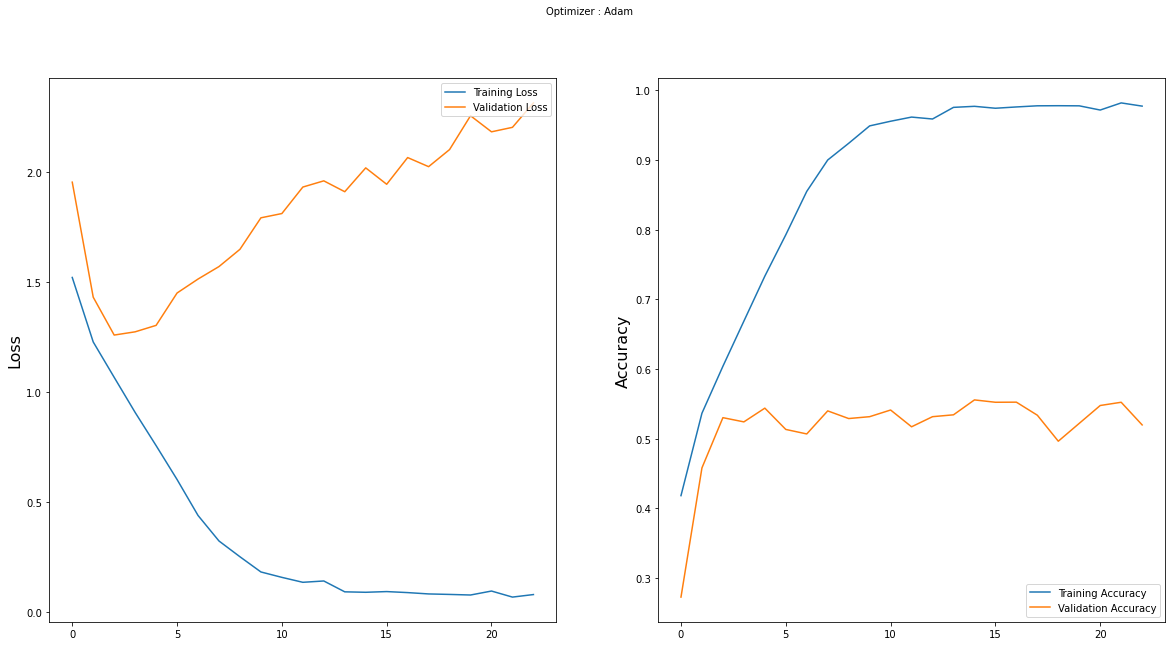

In [21]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history4.history['accuracy'], label='Training Accuracy')
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

## Base Model 5 relu SGD clr

In [22]:
no_of_classes = 7

model5 = Sequential()

# #1st CNN layer
model5.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model5.add(BatchNormalization())
model5.add(Activation('relu'))
model5.add(AveragePooling2D(pool_size = (2,2)))
model5.add(Dropout(0.25))

#2nd CNN layer
model5.add(Conv2D(128,(5,5),padding = 'same'))
model5.add(BatchNormalization())
model5.add(Activation('relu'))
model5.add(AveragePooling2D(pool_size = (2,2)))
model5.add(Dropout (0.25))


model5.add(Flatten())

#Fully connected 1st layer
model5.add(Dense(128))
model5.add(BatchNormalization())
model5.add(Activation('relu'))
model5.add(Dropout(0.25))


model5.add(Dense(no_of_classes, activation='softmax'))



opt = SGD(lr = 0.0001)
model5.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model5.summary()


#Fitting the Model5 with Training and Validation Data

checkpoint = ModelCheckpoint(filepath="/Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/base_relu_SGD_clr.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=stopping_patience,
                          verbose=1,
                          restore_best_weights=True
                          )

# reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
#                               factor=0.2,
#                               patience=3,
#                               verbose=1,
#                               min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint]

epochs = epoc_constant

model5.compile(loss='categorical_crossentropy',
              optimizer = SGD(lr=0.001),
              metrics=['accuracy'])

#Execute Model5

history5 = model5.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_21 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
activation_21 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
average_pooling2d_4 (Average (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_22 (Batc (None, 24, 24, 128)      

2021-12-15 11:21:56.035910: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


287/287 [==============================] - ETA: 0s - loss: 2.0814 - accuracy: 0.2152

2021-12-15 11:22:23.393781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


287/287 [==============================] - 30s 102ms/step - loss: 2.0814 - accuracy: 0.2152 - val_loss: 1.7681 - val_accuracy: 0.3239

Epoch 00001: val_accuracy improved from -inf to 0.32394, saving model to /Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/base_relu_SGD_clr.h5
Epoch 2/100
287/287 [==============================] - 29s 101ms/step - loss: 1.8795 - accuracy: 0.2800 - val_loss: 1.6585 - val_accuracy: 0.3652

Epoch 00002: val_accuracy improved from 0.32394 to 0.36521, saving model to /Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/base_relu_SGD_clr.h5
Epoch 3/100
287/287 [==============================] - 29s 101ms/step - loss: 1.8039 - accuracy: 0.3075 - val_loss: 1.6410 - val_accuracy: 0.3720

Epoch 00003: val_accuracy improved from 0.36521 to 0.37197, saving model to /Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/base_relu_SGD_clr.h5
Epoch 4/100
287/287 [======================

287/287 [==============================] - 29s 101ms/step - loss: 1.4473 - accuracy: 0.4479 - val_loss: 1.3990 - val_accuracy: 0.4638

Epoch 00028: val_accuracy improved from 0.45986 to 0.46380, saving model to /Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/base_relu_SGD_clr.h5
Epoch 29/100
287/287 [==============================] - 29s 101ms/step - loss: 1.4365 - accuracy: 0.4520 - val_loss: 1.3987 - val_accuracy: 0.4623

Epoch 00029: val_accuracy did not improve from 0.46380
Epoch 30/100
287/287 [==============================] - 29s 101ms/step - loss: 1.4300 - accuracy: 0.4505 - val_loss: 1.3912 - val_accuracy: 0.4649

Epoch 00030: val_accuracy improved from 0.46380 to 0.46493, saving model to /Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/base_relu_SGD_clr.h5
Epoch 31/100
287/287 [==============================] - 29s 101ms/step - loss: 1.4221 - accuracy: 0.4574 - val_loss: 1.4112 - val_accuracy: 0.4587

Epoch 00031:

287/287 [==============================] - 30s 103ms/step - loss: 1.2812 - accuracy: 0.5177 - val_loss: 1.3168 - val_accuracy: 0.4959

Epoch 00060: val_accuracy did not improve from 0.51296
Epoch 61/100
287/287 [==============================] - 29s 102ms/step - loss: 1.2769 - accuracy: 0.5144 - val_loss: 1.3344 - val_accuracy: 0.4866

Epoch 00061: val_accuracy did not improve from 0.51296
Epoch 62/100
287/287 [==============================] - 29s 102ms/step - loss: 1.2705 - accuracy: 0.5212 - val_loss: 1.3398 - val_accuracy: 0.4903

Epoch 00062: val_accuracy did not improve from 0.51296
Epoch 63/100
287/287 [==============================] - 29s 102ms/step - loss: 1.2756 - accuracy: 0.5170 - val_loss: 1.3129 - val_accuracy: 0.4993

Epoch 00063: val_accuracy did not improve from 0.51296
Epoch 64/100
287/287 [==============================] - 29s 100ms/step - loss: 1.2642 - accuracy: 0.5193 - val_loss: 1.2783 - val_accuracy: 0.5161

Epoch 00064: val_accuracy improved from 0.51296 to 0.

287/287 [==============================] - 29s 101ms/step - loss: 1.1797 - accuracy: 0.5569 - val_loss: 1.2384 - val_accuracy: 0.5324

Epoch 00096: val_accuracy did not improve from 0.53451
Epoch 97/100
287/287 [==============================] - 29s 102ms/step - loss: 1.1750 - accuracy: 0.5602 - val_loss: 1.2448 - val_accuracy: 0.5317

Epoch 00097: val_accuracy did not improve from 0.53451
Epoch 98/100
287/287 [==============================] - 29s 102ms/step - loss: 1.1728 - accuracy: 0.5596 - val_loss: 1.2340 - val_accuracy: 0.5297

Epoch 00098: val_accuracy did not improve from 0.53451
Epoch 99/100
287/287 [==============================] - 29s 101ms/step - loss: 1.1667 - accuracy: 0.5634 - val_loss: 1.2467 - val_accuracy: 0.5301

Epoch 00099: val_accuracy did not improve from 0.53451
Epoch 100/100
287/287 [==============================] - 30s 104ms/step - loss: 1.1693 - accuracy: 0.5632 - val_loss: 1.2696 - val_accuracy: 0.5176

Epoch 00100: val_accuracy did not improve from 0.534

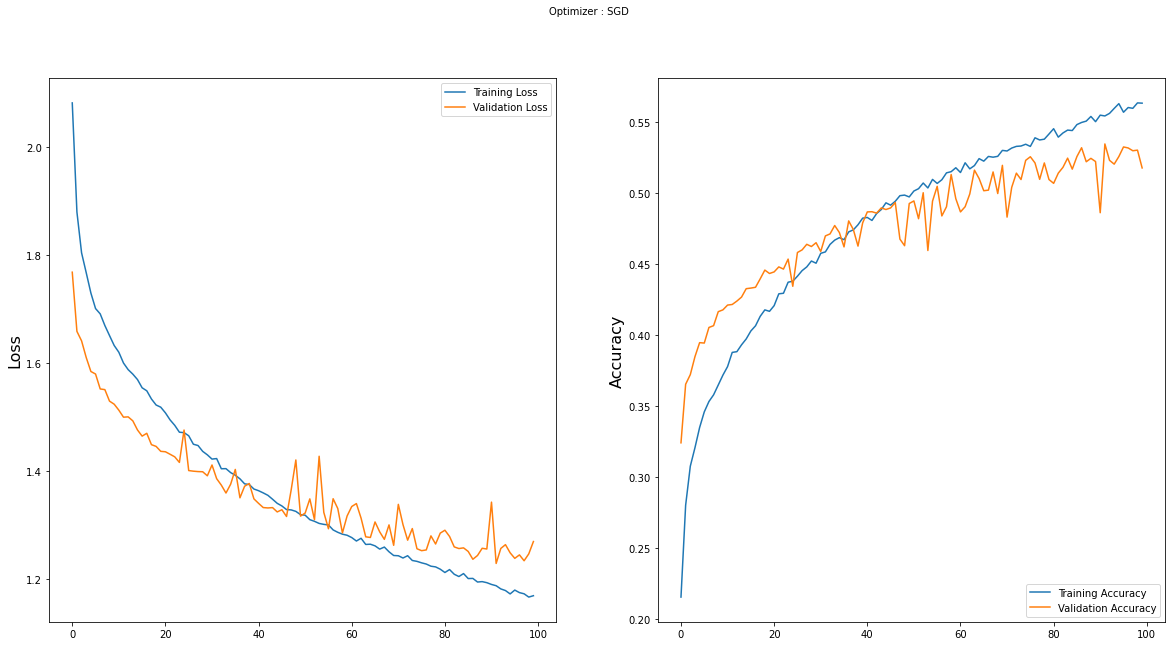

In [23]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : SGD', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history5.history['loss'], label='Training Loss')
plt.plot(history5.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history5.history['accuracy'], label='Training Accuracy')
plt.plot(history5.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

## Base Model 6 relu Nadam clr

In [24]:
no_of_classes = 7

model6 = Sequential()

# #1st CNN layer
model6.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model6.add(BatchNormalization())
model6.add(Activation('relu'))
model6.add(AveragePooling2D(pool_size = (2,2)))
model6.add(Dropout(0.25))

#2nd CNN layer
model6.add(Conv2D(128,(5,5),padding = 'same'))
model6.add(BatchNormalization())
model6.add(Activation('relu'))
model6.add(AveragePooling2D(pool_size = (2,2)))
model6.add(Dropout (0.25))


model6.add(Flatten())

#Fully connected 1st layer
model6.add(Dense(128))
model6.add(BatchNormalization())
model6.add(Activation('relu'))
model6.add(Dropout(0.25))


model6.add(Dense(no_of_classes, activation='softmax'))



opt = Nadam(lr = 0.0001)
model6.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model6.summary()


#Fitting the Model6 with Training and Validation Data

checkpoint = ModelCheckpoint(filepath="/Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/base_relu_Nadam_clr.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=stopping_patience,
                          verbose=1,
                          restore_best_weights=True
                          )

# reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
#                               factor=0.2,
#                               patience=3,
#                               verbose=1,
#                               min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint]

epochs = epoc_constant

model6.compile(loss='categorical_crossentropy',
              optimizer = Nadam(lr=0.001),
              metrics=['accuracy'])

#Execute Model6

history6 = model6.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )




Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_24 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
activation_24 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
average_pooling2d_6 (Average (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_25 (Batc (None, 24, 24, 128)      

2021-12-15 12:25:43.274823: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


287/287 [==============================] - ETA: 0s - loss: 1.6302 - accuracy: 0.3819

2021-12-15 12:26:16.603838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


287/287 [==============================] - 36s 123ms/step - loss: 1.6302 - accuracy: 0.3819 - val_loss: 1.5343 - val_accuracy: 0.4139

Epoch 00001: val_accuracy improved from -inf to 0.41394, saving model to /Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/base_relu_Nadam_clr.h5
Epoch 2/100
287/287 [==============================] - 36s 126ms/step - loss: 1.3380 - accuracy: 0.4875 - val_loss: 1.3315 - val_accuracy: 0.4827

Epoch 00002: val_accuracy improved from 0.41394 to 0.48268, saving model to /Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/base_relu_Nadam_clr.h5
Epoch 3/100
287/287 [==============================] - 36s 126ms/step - loss: 1.2226 - accuracy: 0.5394 - val_loss: 1.3419 - val_accuracy: 0.4859

Epoch 00003: val_accuracy improved from 0.48268 to 0.48592, saving model to /Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/base_relu_Nadam_clr.h5
Epoch 4/100
287/287 [================

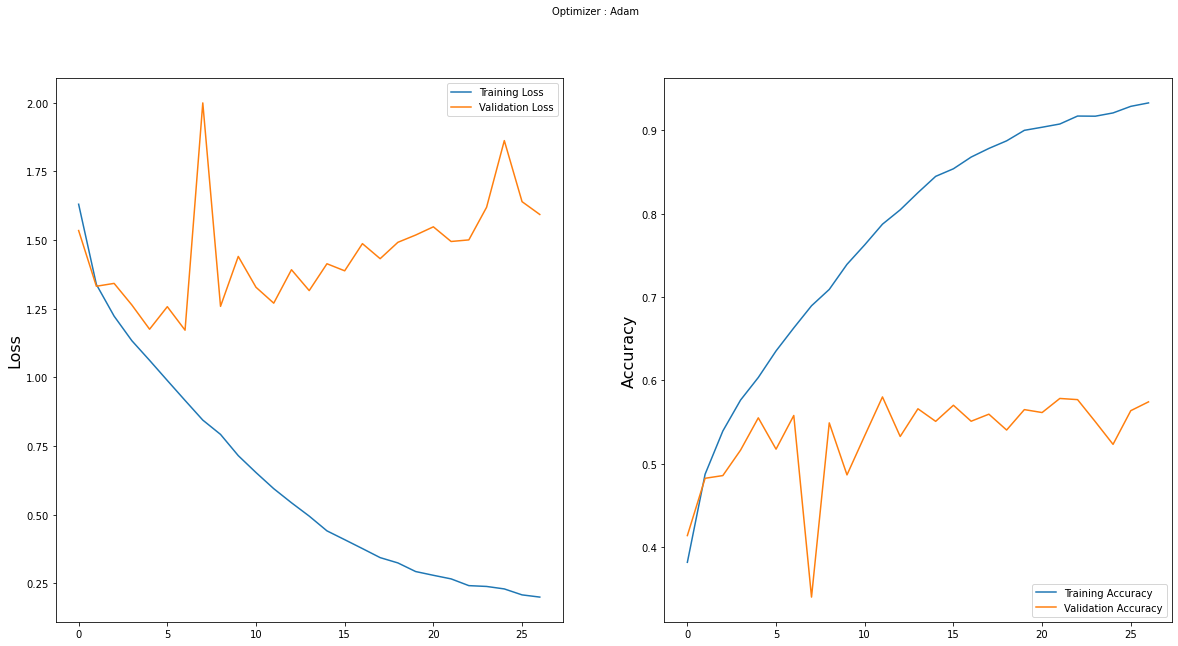

In [25]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history6.history['loss'], label='Training Loss')
plt.plot(history6.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history6.history['accuracy'], label='Training Accuracy')
plt.plot(history6.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

## Tesing with total test data

In [4]:
emotion_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise']

In [5]:
df = pd.read_csv('/Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/fer2013_Modified.csv')
df

,emotion,Usage,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,...,p_2295,p_2296,p_2297,p_2298,p_2299,p_2300,p_2301,p_2302,p_2303,p_2304
0,0,Training,70,80,82,72,58,58,60,63,...,159,182,183,136,106,116,95,106,109,82
1,0,Training,151,150,147,155,148,133,111,140,...,105,108,95,108,102,67,171,193,183,184
2,2,Training,231,212,156,164,174,138,161,173,...,104,138,152,122,114,101,97,88,110,152
3,4,Training,24,32,36,30,32,23,19,20,...,174,126,132,132,133,136,139,142,143,142
4,6,Training,4,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35882,6,PrivateTest,50,36,17,22,23,29,33,39,...,216,215,216,217,221,222,220,223,221,216
35883,3,PrivateTest,178,174,172,173,181,188,191,194,...,147,141,136,118,66,7,0,0,0,0
35884,0,PrivateTest,17,17,16,23,28,22,19,17,...,190,179,193,193,194,170,148,154,133,113
35885,3,PrivateTest,30,28,28,29,31,30,42,68,...,30,27,27,26,28,35,35,35,30,28


In [19]:
df_test=df[df['Usage'].isin(['PublicTest','PrivateTest'])].reset_index()
df_test

,index,emotion,Usage,p_1,p_2,p_3,p_4,p_5,p_6,p_7,...,p_2295,p_2296,p_2297,p_2298,p_2299,p_2300,p_2301,p_2302,p_2303,p_2304
0,28709,0,PublicTest,254,254,254,254,254,249,255,...,90,92,99,84,22,0,0,42,129,180
1,28710,1,PublicTest,156,184,198,202,204,207,210,...,201,199,197,193,188,184,180,172,167,161
2,28711,4,PublicTest,69,118,61,60,96,121,103,...,93,93,92,90,92,93,92,88,87,90
3,28712,6,PublicTest,205,203,236,157,83,158,120,...,207,211,213,206,196,181,112,43,82,86
4,28713,3,PublicTest,87,79,74,66,74,96,77,...,33,32,33,35,38,40,45,41,34,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7173,35882,6,PrivateTest,50,36,17,22,23,29,33,...,216,215,216,217,221,222,220,223,221,216
7174,35883,3,PrivateTest,178,174,172,173,181,188,191,...,147,141,136,118,66,7,0,0,0,0
7175,35884,0,PrivateTest,17,17,16,23,28,22,19,...,190,179,193,193,194,170,148,154,133,113
7176,35885,3,PrivateTest,30,28,28,29,31,30,42,...,30,27,27,26,28,35,35,35,30,28


In [20]:
y_true = df_test['emotion'].to_numpy()
y_true

array([0, 1, 4, ..., 0, 3, 2])

In [21]:
df_test_x = df_test.drop(['index','emotion','Usage'],axis=1)
df_test_x

,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,...,p_2295,p_2296,p_2297,p_2298,p_2299,p_2300,p_2301,p_2302,p_2303,p_2304
0,254,254,254,254,254,249,255,160,2,58,...,90,92,99,84,22,0,0,42,129,180
1,156,184,198,202,204,207,210,212,213,214,...,201,199,197,193,188,184,180,172,167,161
2,69,118,61,60,96,121,103,87,103,88,...,93,93,92,90,92,93,92,88,87,90
3,205,203,236,157,83,158,120,116,94,86,...,207,211,213,206,196,181,112,43,82,86
4,87,79,74,66,74,96,77,80,80,84,...,33,32,33,35,38,40,45,41,34,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7173,50,36,17,22,23,29,33,39,34,37,...,216,215,216,217,221,222,220,223,221,216
7174,178,174,172,173,181,188,191,194,196,199,...,147,141,136,118,66,7,0,0,0,0
7175,17,17,16,23,28,22,19,17,25,26,...,190,179,193,193,194,170,148,154,133,113
7176,30,28,28,29,31,30,42,68,79,81,...,30,27,27,26,28,35,35,35,30,28


In [22]:
test = df_test_x.values.reshape(-1,48,48,1).astype('float32')

## Load-ensemble models

In [70]:
ensemble_path = '/Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/'

ensemble1 = load_model(ensemble_path+'ensemble1.h5')
ensemble2 = load_model(ensemble_path+'ensemble2.h5')
ensemble3 = load_model(ensemble_path+'ensemble3.h5')
ensemble4 = load_model(ensemble_path+'ensemble4.h5')
ensemble5 = load_model(ensemble_path+'ensemble5.h5')
# model2 = load_model(ensemble_path+'model-2.h5')
# ensemble_models = [model2]

ensemble_models = [ensemble1,ensemble2,ensemble3,ensemble4,ensemble5]

In [71]:
y_pred_en=[]
for en_model in ensemble_models:
    y_pred_en.append(en_model.predict(test_set).argmax(axis=1))


2021-12-14 13:33:32.106118: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-14 13:33:34.248322: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-14 13:33:36.223833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-14 13:33:38.214378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-14 13:33:40.201576: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [72]:
y_pred_en

[array([6, 3, 4, ..., 5, 3, 5]),
 array([6, 5, 3, ..., 0, 0, 2]),
 array([2, 2, 3, ..., 0, 6, 0]),
 array([5, 4, 6, ..., 4, 4, 6]),
 array([0, 2, 2, ..., 2, 5, 5])]

In [73]:
y_pred_final=stats.mode(y_pred_en)[0][0]
y_pred_final

array([6, 2, 3, ..., 0, 0, 5])

In [76]:
final_lables

array([0, 2, 6, ..., 4, 0, 2])

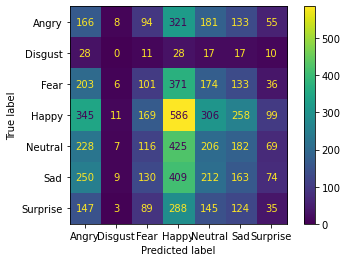

<Figure size 1440x1440 with 0 Axes>

In [74]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(final_lables, y_pred_final),display_labels=emotion_labels)
disp.plot()
plt.figure(figsize=(20,20))
plt.show()

In [75]:
accuracy_score(final_lables, y_pred_final)

0.1751184173864586

In [7]:
ensemble_path = '/Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/'



In [8]:
ensemble5 = load_model(ensemble_path+'ensemble5.h5')

Metal device set to: Apple M1


2021-12-14 13:43:48.418471: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-14 13:43:48.418914: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
ensemble5.evaluate(test_set)

72/72 [==============================] - 4s 59ms/step - loss: 1.2409 - accuracy: 0.6131


[1.240870475769043, 0.6131234765052795]

In [11]:
ensemble5.evaluate(test_set)

72/72 [==============================] - 5s 66ms/step - loss: 1.2409 - accuracy: 0.6131


[1.2408705949783325, 0.6131234765052795]